<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Import</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#First-look" data-toc-modified-id="First-look-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>First look</a></span></li><li><span><a href="#Target-variable" data-toc-modified-id="Target-variable-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target variable</a></span></li><li><span><a href="#cont1" data-toc-modified-id="cont1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>cont1</a></span></li><li><span><a href="#cont2" data-toc-modified-id="cont2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>cont2</a></span></li><li><span><a href="#cont3" data-toc-modified-id="cont3-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>cont3</a></span></li><li><span><a href="#cont4" data-toc-modified-id="cont4-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>cont4</a></span></li><li><span><a href="#cont5" data-toc-modified-id="cont5-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>cont5</a></span></li><li><span><a href="#cont6" data-toc-modified-id="cont6-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>cont6</a></span></li><li><span><a href="#cont7" data-toc-modified-id="cont7-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>cont7</a></span></li><li><span><a href="#cont8" data-toc-modified-id="cont8-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>cont8</a></span></li><li><span><a href="#cont9" data-toc-modified-id="cont9-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>cont9</a></span></li><li><span><a href="#cont10" data-toc-modified-id="cont10-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>cont10</a></span></li><li><span><a href="#cont11" data-toc-modified-id="cont11-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>cont11</a></span></li><li><span><a href="#cont12" data-toc-modified-id="cont12-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>cont12</a></span></li><li><span><a href="#cont13" data-toc-modified-id="cont13-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>cont13</a></span></li><li><span><a href="#cont14" data-toc-modified-id="cont14-1.16"><span class="toc-item-num">1.16&nbsp;&nbsp;</span>cont14</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.17"><span class="toc-item-num">1.17&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Separate-dataset-into-train-and-valid-set" data-toc-modified-id="Separate-dataset-into-train-and-valid-set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Separate dataset into train and valid set</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Numerical-variable-transformation---Yeo-Johnson-transformation" data-toc-modified-id="Numerical-variable-transformation---Yeo-Johnson-transformation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerical variable transformation - Yeo-Johnson transformation</a></span></li></ul></li></ul></div>

# Tabular Playground - Jan

In the series of Tabular Playground competition in Kaggle, this notebook will explore the first competition (January). The data contains 15 numerical variables. 



### Import

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib


# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/Tabular/Jan'

In [3]:
# create a dataset's path
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/Tabular/Jan')

In [4]:
df = pd.read_csv(path/'train.csv')
print(df.shape)
df.head()

(300000, 16)


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


## Exploratory Data Analysis

### First look

Let's take a look at the dataset - if they have missing values, what data types they have, and statistical information. 

In [5]:
# figure out if they have missing values
[var for var in df.columns if df[var].isnull().sum() > 0]

[]

In [6]:
# data types
df.dtypes

id          int64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
cont14    float64
target    float64
dtype: object

In [7]:
# statistical information
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


We can see that 5 variables contain negative values: cont1, cont2, cont7, cont9, cont10.



Since all variables are numerical variables, we need to look at the distribution of each variable. Gaussian distribution would be preferable if we use linear models later. 

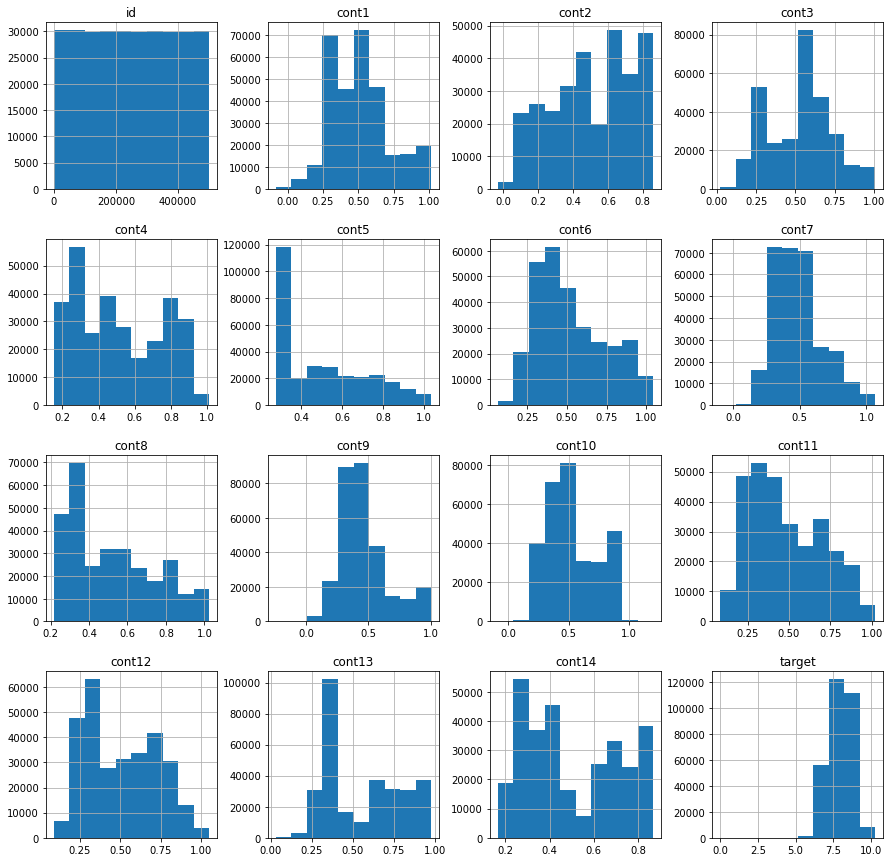

In [8]:
df.hist(figsize=(15,15));

At the first glance, we can see that some variables have a Gaussian distribution (cont1, cont3, cont6, cont7, cont9, cont10). Also, some variables are skewed towards the right (cont5, cont8) or towards the left (target). By using variable transformation methods, we can improve the value spread of each variable. 

Let's create disagnotic_plots function to evaluate each variable

In [9]:
def diagnostic_plots(df, variable, bins=10):
    """Function to plot a histogrm and Q-Q plot side by side, for a certain variable"""
    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    sns.histplot(df[variable], bins=bins)
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('RM quantile')
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

We also need to detect if the variables have outliers. If they do, we need to handle with outliers. Detecting outliers methods would be different depending on the variable's distribution. So, I will create two functions as follows:


In [10]:
def find_normal_boundaries(df, variable):
    """Function to find upper and lower boundaries for normally distributed variables"""
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    
    return upper_boundary, lower_boundary

In [11]:
def find_skewed_boundaries(df, variable, distance):
    """Function to find boundaries for skewed distributions
    distance: gives us the option to estimate 1.5 times or 3 times 
              the IQR to calculate the boundaries.
    """
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    
    return upper_boundary, lower_boundary

### Target variable

Let's start by exploring the target variable.

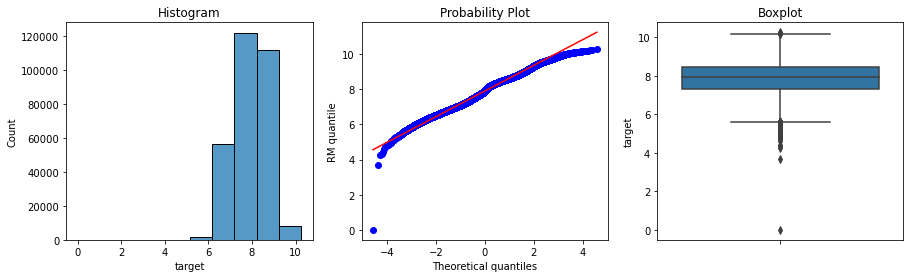

In [12]:
# original target
diagnostic_plots(df, 'target')

`target` has a Gaussian distribution but also has several outliers. We can see the dot on 0 in both Q-Q plot and Boxplot, and we can guass that dot could be an outlier. In order to confirm this theory, we can remove the 0 value and see the distribution of target again. 

In [13]:
# How many rows have 0 value for target
len(df[df['target']==0])

1

original dataset: (300000, 16)
removed outlier dataset: (299999, 16)


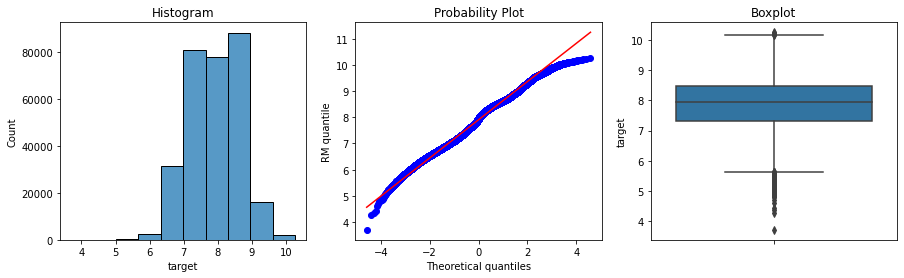

In [14]:
# copy df and remove 0 value for target
# and create diagnostic_plots again
df_copy = df.copy()
df_copy = df_copy[(df_copy.target != 0)]
print('original dataset: {}'.format(df.shape))
print('removed outlier dataset: {}'.format(df_copy.shape))

diagnostic_plots(df_copy, 'target')

We can see improved distribution of target by removing 0 value, so we can drop 0 value from target. 

In [15]:
df = df[(df.target != 0)]
df.shape

(299999, 16)

### cont1

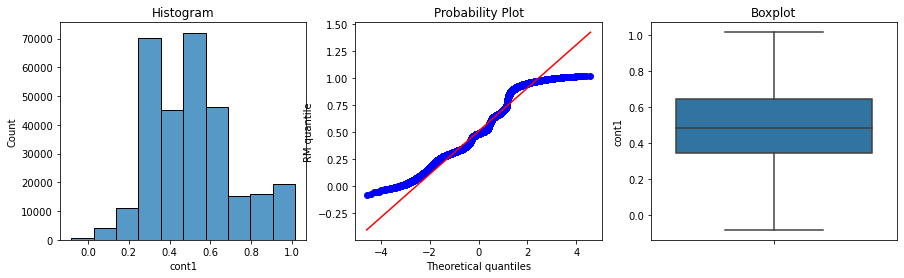

In [16]:
# original cont1
diagnostic_plots(df, 'cont1', bins=10)

From `cont1`'s histogram and the Q-Q plot, we can see that the variable shows a Gaussian distribution, but there is a deviation from the distribution towards the large values. It seems there is no outlier, as there is no dots sitting outside the whiskers in boxplot. 

### cont2

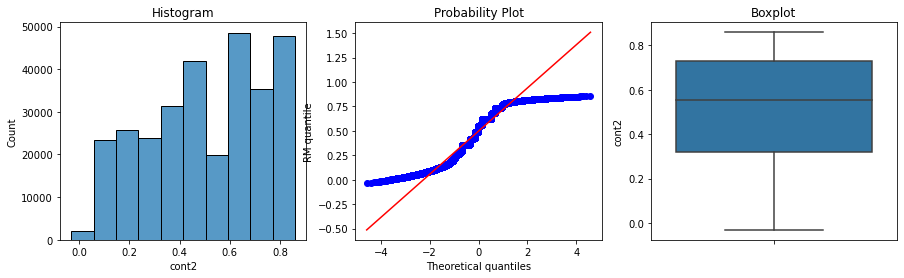

In [17]:
# original cont2
diagnostic_plots(df, 'cont2', bins=10)

`cont2` shows non-gaussian distribution. 

Optimal λ:  1.7433336498459346


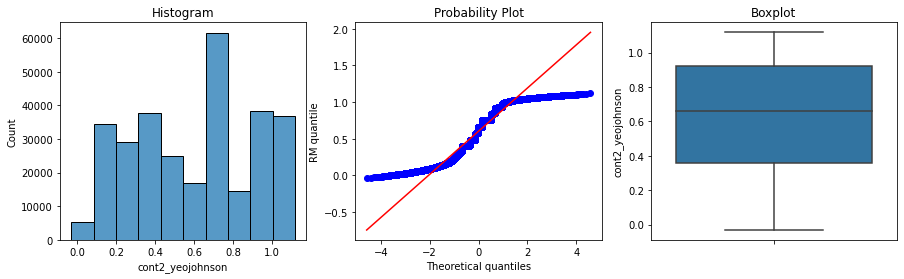

In [18]:
# yeo-johnson transformation
df_copy = df.copy()
df_copy['cont2_yeojohnson'], param = stats.yeojohnson(df_copy['cont2'])
print('Optimal λ: ', param)
diagnostic_plots(df_copy, 'cont2_yeojohnson', bins=10)

yeo-johnson improve the distribution a little

### cont3 

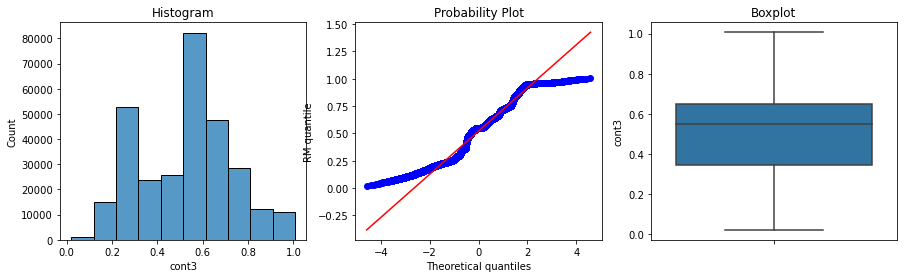

In [19]:
# original dataset
diagnostic_plots(df, 'cont3', bins=10)

`cont3` has a Gaussian distribution with the deviation from the distribution towsards the small values based on the histogram and Q-Q plot. 

### cont4 

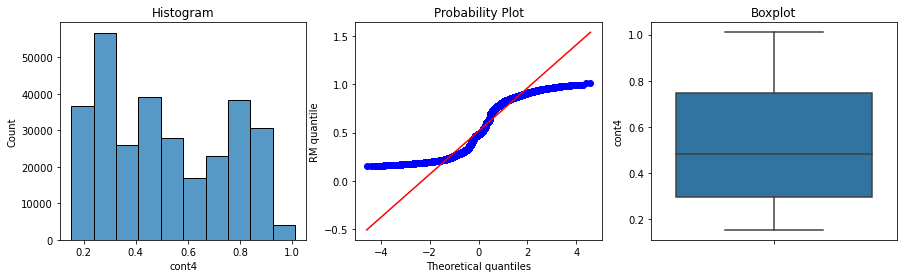

In [20]:
# original dataset
diagnostic_plots(df, 'cont4', bins=10)

Optimal λ:  -0.5297847796904953


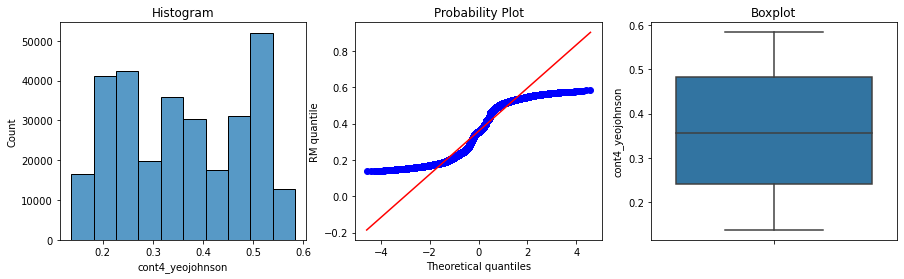

In [21]:
# yeo-johnson transformation
df_copy = df.copy()
df_copy['cont4_yeojohnson'], param = stats.yeojohnson(df_copy['cont4'])
print('Optimal λ: ', param)
diagnostic_plots(df_copy, 'cont4_yeojohnson', bins=10)

yeo-johnson improved distribution 

### cont5 

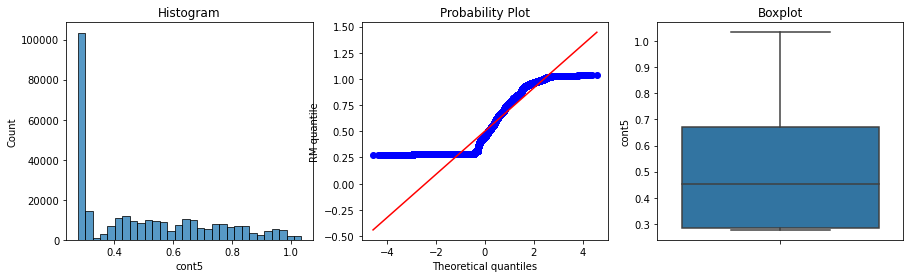

In [22]:
# original dataset
diagnostic_plots(df, 'cont5', bins=30)

`cont5` is not normally distributed, it is skewed with a tail to the right. 

Optimal λ:  -2.3914233118341883


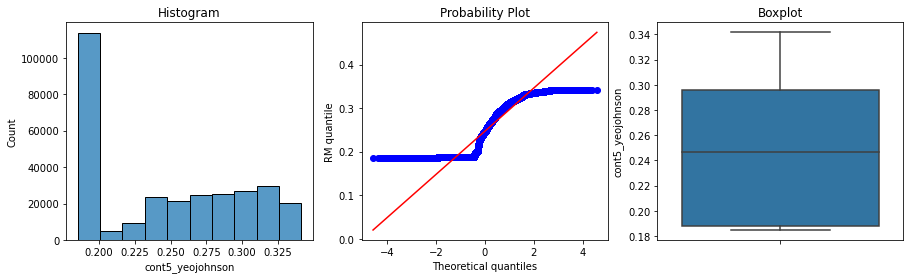

In [23]:
# yeo-johnson transformation
df_copy = df.copy()
df_copy['cont5_yeojohnson'], param = stats.yeojohnson(df_copy['cont5'])
print('Optimal λ: ', param)
diagnostic_plots(df_copy, 'cont5_yeojohnson', bins=10)

I tried several transformations, but none of them improved the distribution

### cont6 

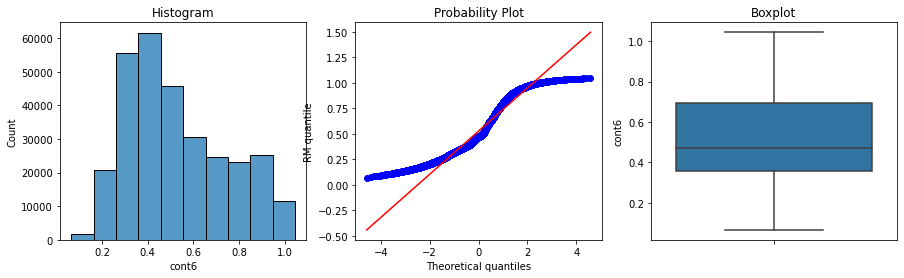

In [24]:
# original dataset
diagnostic_plots(df, 'cont6', bins=10)

We can say `cont6` is a Gaussian distribution

### cont7 

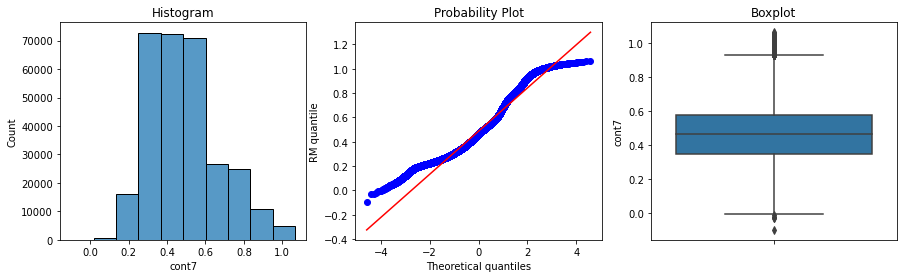

In [25]:
# original dataset
diagnostic_plots(df, 'cont7', bins=10)

From the `cont7`' histogram and Q-Q plot, we see that the variable rm approximates a Gaussian distribution quite well. In the boxplot, we see that the variable could have outliers, as there are many dots sitting outside the whiskers, at both tails of the distribution. 

### cont8 

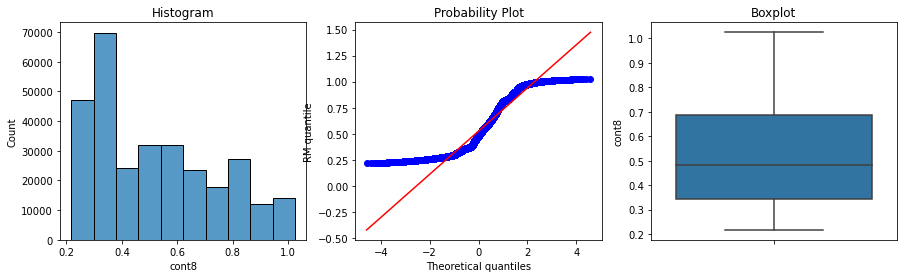

In [26]:
# original dataset
diagnostic_plots(df, 'cont8', bins=10)

`cont8` is skewed with a tail to the right. 

Optimal λ:  -1.9531998105684276


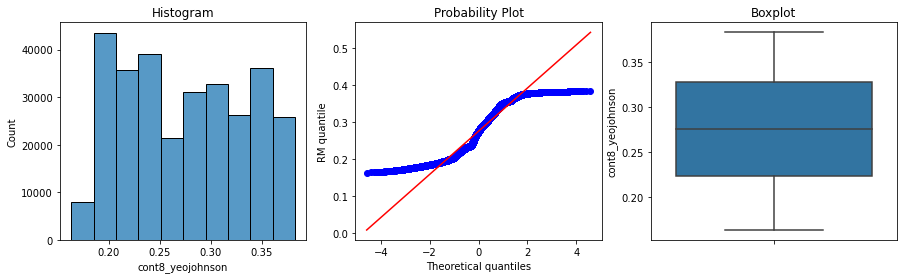

In [27]:
# yeo-johnson transformation
df_copy = df.copy()
df_copy['cont8_yeojohnson'], param = stats.yeojohnson(df_copy['cont8'])
print('Optimal λ: ', param)
diagnostic_plots(df_copy, 'cont8_yeojohnson', bins=10)

Distribution was improved by yeo-johnson transformation

### cont9 

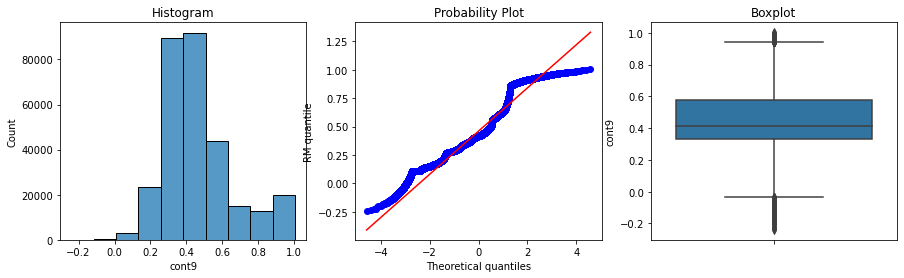

In [28]:
# original dataset
diagnostic_plots(df, 'cont9', bins=10)

From the `cont9`'s histogram and the Q-Q plot, we see that the variable approximates fairly well a Gaussian distribution. There is a deviation from the distribution towards the large values of `cont9`. In the boxplot, we can see that the variable could have outliers, we there are many dots sitting outside the whiskers, at the left end and the right end of the distribution (top and bottom whisker in the boxplot). 

### cont10 

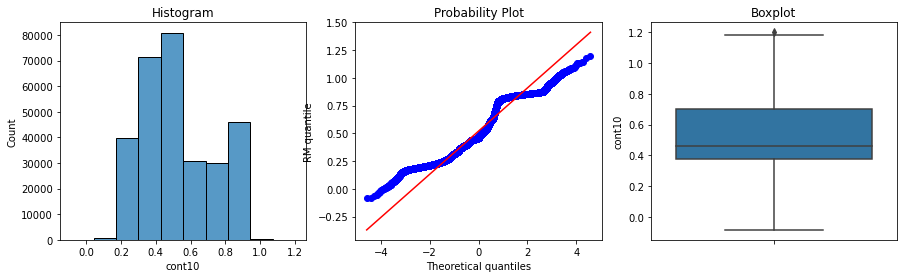

In [29]:
# original dataset
diagnostic_plots(df, 'cont10', bins=10)

`cont10`'s histogram and Q-Q plot show a Gaussian distribution, and there are some outliers in the botxplot.

### cont11 

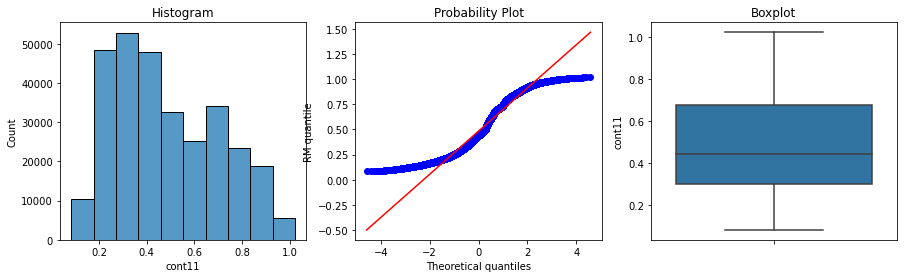

In [30]:
# original dataset
diagnostic_plots(df, 'cont11', bins=10)

`cont11` shows a Gaussian distribution. 

### cont12 

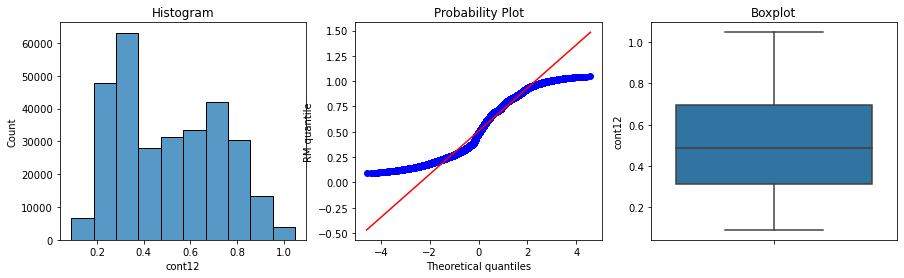

In [31]:
# original dataset
diagnostic_plots(df, 'cont12', bins=10)

`cont12` shows a Gaussian distribution with the deviation from the distribution towards the smaller value. 

### cont13

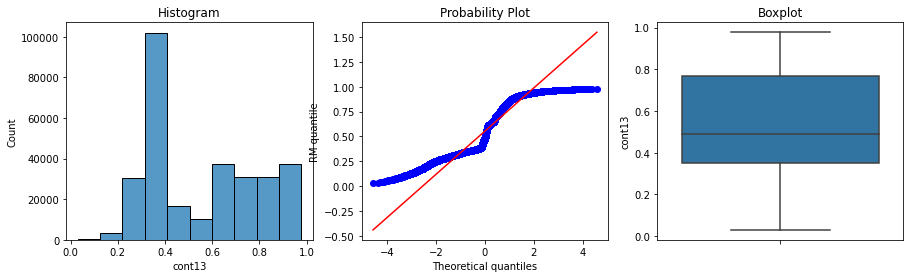

In [32]:
# original dataset
diagnostic_plots(df, 'cont13', bins=10)

`cont13` shows a non-Gaussian distribution

Optimal λ:  -1.0952307784720647


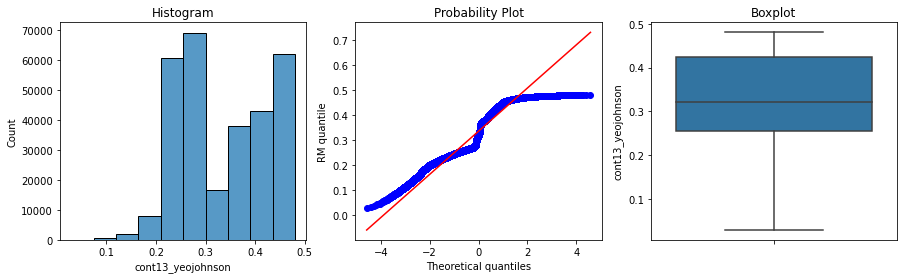

In [33]:
# yeo-johnson transformation
df_copy = df.copy()
df_copy['cont13_yeojohnson'], param = stats.yeojohnson(df_copy['cont13'])
print('Optimal λ: ', param)
diagnostic_plots(df_copy, 'cont13_yeojohnson', bins=10)

yeo-johnson improved distribution a little

### cont14

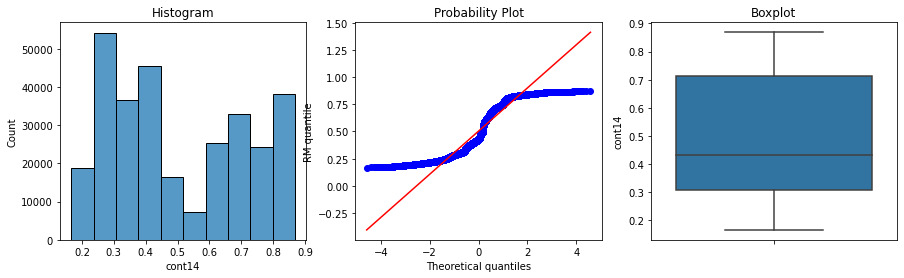

In [34]:
# original dataset
diagnostic_plots(df, 'cont14', bins=10)

`cont14` shows a non-Gaussian distribution, and see binomial distribution. 

Optimal λ:  -0.8132018135492866


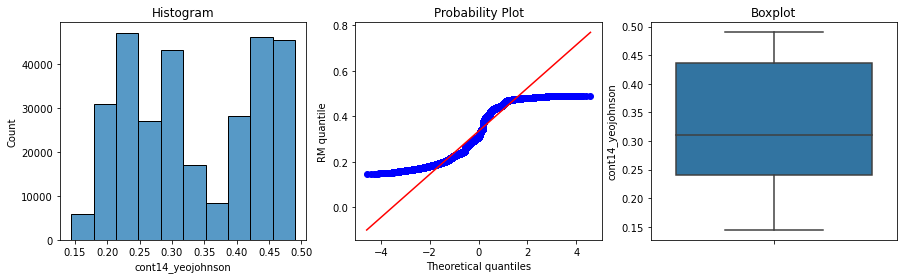

In [35]:
# yeo-johnson transformation
df_copy = df.copy()
df_copy['cont14_yeojohnson'], param = stats.yeojohnson(df_copy['cont14'])
print('Optimal λ: ', param)
diagnostic_plots(df_copy, 'cont14_yeojohnson', bins=10)

yeo-johnson didn't improve the value spread

### Summary

- __target__: we found one value of outlier, and removed it from dataset. 
- __yeo-johnson transformation__: we will perform yeo-johnson transformation for several variables (cont2, cont4, cont8, cont13) which showed improved distribution by yeo-johnson method.
- __no-transformation__: 
    - we found that several variables show a Gaussian distribution, so we do not need to use any variable transformation for them (cont1, cont3, cont6, cont7, cont9, cont10, cont11, cont12, cont14). 
    - Also, even though some variables are not a Gaussian distribution, yeo-johnson did not improve its distribution (cont5, cont14). 

## Separate dataset into train and valid set

It is important to separate our data into training and valid set. 

When we engineer features, some techniques learn parameters from data. It is important to learn these parameters only from the train set. This is to avoid over-fitting. 

In [36]:
# save id column for later
df_id = df['id']

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(
    df.drop(['id', 'target'], axis=1), # predictive variables
    df['target'], # target
    test_size=0.3, # portion of dataset to allocate to test set
    random_state=42, 
)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((209999, 14), (209999,), (90000, 14), (90000,))

## Feature Engineering

### Numerical variable transformation - Yeo-Johnson transformation

We will apply yeo-johnson transformation to cont2, cont4, cont8, cont13, (cont5, cont14)

In [38]:
def fun_yeojohnson(df, variable):
    """ Function to transform numerical variables
    by using yeojohnson method"""
    
    # it need to learn the parameter from the train set
    X_train[variable], param = stats.yeojohnson(X_train[variable])
    
    # and then apply the transformation to the test set with the same parameter
    X_valid[variable] = stats.yeojohnson(X_valid[variable], lmbda=param)
    


In [42]:
# create a list for variables that we need to transform
tran_vars = ['cont2', 'cont4', 'cont8', 'cont13', 'cont5', 'cont14']

# apply yeo-johnson function
for var in tran_vars:
    fun_yeojohnson(df, var)

In [43]:
X_train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
119497,0.498190,0.401804,0.717142,0.325608,0.265067,0.484992,0.796132,0.206853,0.417590,0.594613,0.724172,0.714432,0.248969,0.400283
274740,0.372677,0.088862,0.455815,0.520639,0.228947,0.256223,0.403291,0.201786,0.338834,0.213075,0.201481,0.256038,0.238676,0.206540
74908,0.494812,0.841105,0.223885,0.552762,0.231814,0.355809,0.327293,0.303496,0.352394,0.348153,0.405837,0.318485,0.217508,0.239807
11630,0.334171,0.488204,0.634906,0.311885,0.309479,0.182745,0.383613,0.187570,0.322235,0.356344,0.220811,0.212795,0.237437,0.241916
216748,0.789992,0.573986,0.458738,0.507081,0.187491,0.260392,0.186345,0.313686,0.240741,0.632301,0.793075,0.286422,0.191866,0.281469


__Continue...__